## Created and Modified by Arya Joshi

In [102]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [11]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a232e2a10>,
      dtype=object)

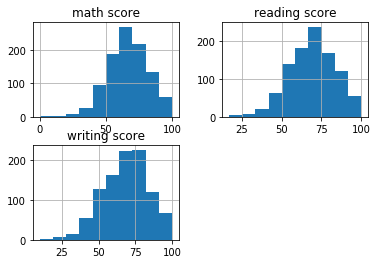

In [15]:
df.hist(bins=10)

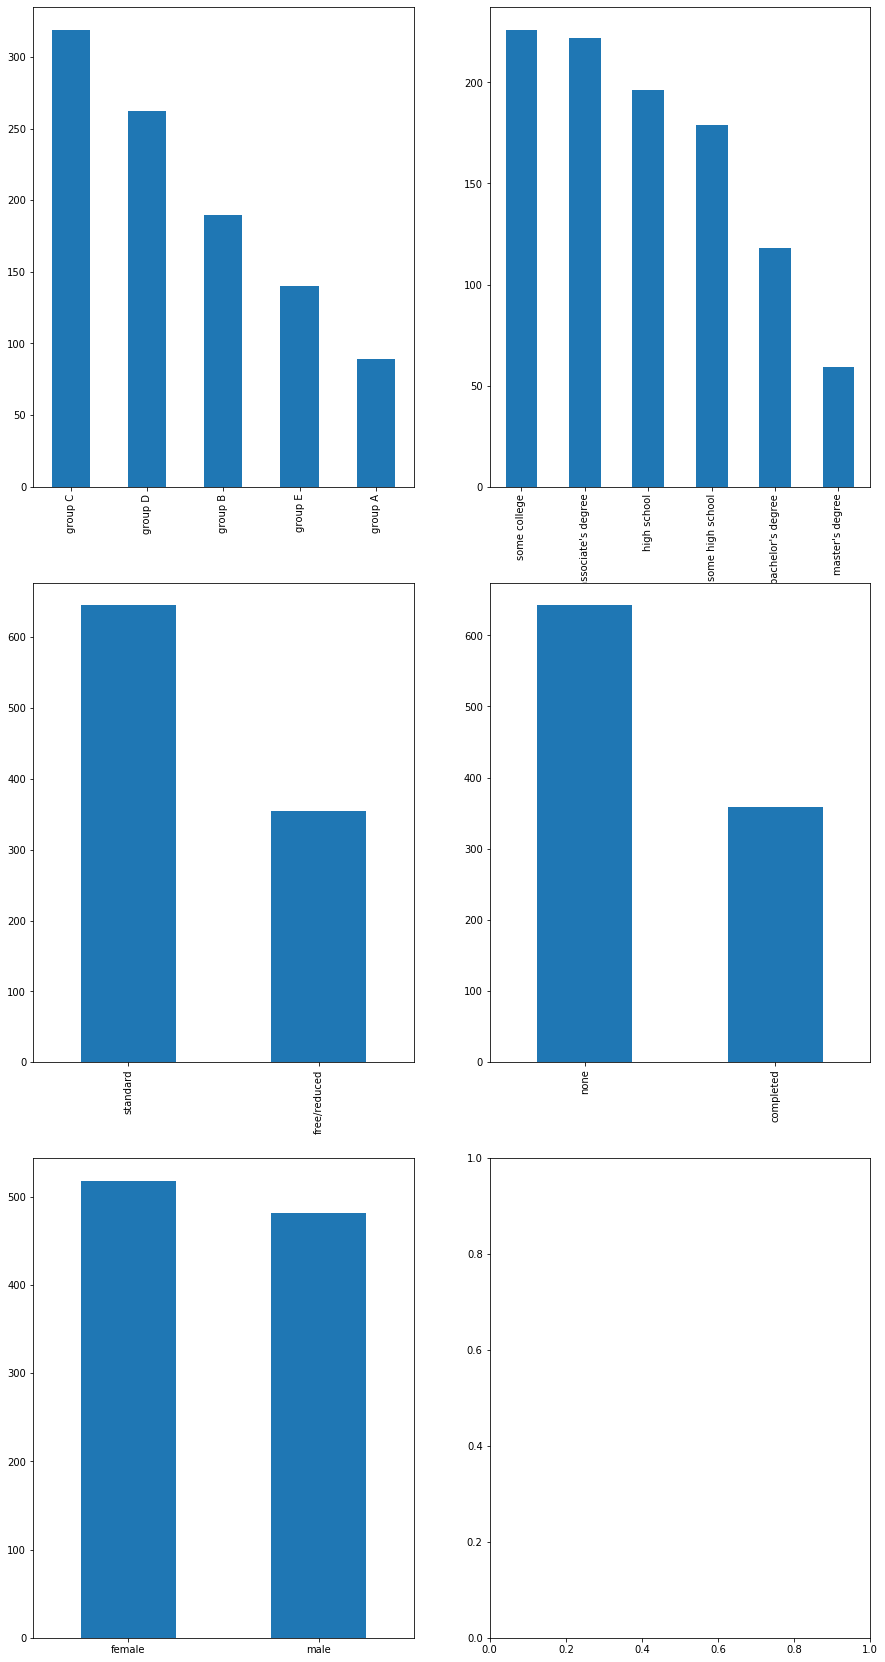

In [64]:
f, axes = plt.subplots(3,2, figsize=(15,30))


df['race/ethnicity'].value_counts().plot.bar(ax=axes[0][0])
df['parental level of education'].value_counts().plot.bar(ax=axes[0][1])  
df['lunch'].value_counts().plot.bar(ax=axes[1][0]) 
df['test preparation course'].value_counts().plot.bar(ax=axes[1][1]) 
df['gender'].value_counts().plot.bar(ax=axes[2][0],rot = 0) 


In [67]:
for col in df.columns:
    print (df[col].isnull().value_counts())

False    1000
Name: gender, dtype: int64
False    1000
Name: race/ethnicity, dtype: int64
False    1000
Name: parental level of education, dtype: int64
False    1000
Name: lunch, dtype: int64
False    1000
Name: test preparation course, dtype: int64
False    1000
Name: math score, dtype: int64
False    1000
Name: reading score, dtype: int64
False    1000
Name: writing score, dtype: int64


In [103]:
#Logistic regression
features = df[['math score', 'reading score','writing score']]
labels = pd.DataFrame(np.where(df['gender'] == 'male', 1, 0),columns=['gender'])

#train-test split
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size = 0.2)

#train model
clf = LogisticRegression(random_state=0).fit(features_train,labels_train )
# Predict model
labels_pred = clf.predict(features_test)

#accuracy
accuracy = clf.score(features_test,labels_test)

print ('The accuracy of the model is ',accuracy*100,'%')
confusion_matrix(labels_test,labels_pred)

The accuracy of the model is  91.5 %


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[90,  6],
       [11, 93]])